In [1]:
import numpy as np
import glob

THIS IS A COMMENT

### Finding files

In [18]:
#here is where to find the data
data_dir = "Y:\\Ryle\\Data\\2021-08-19\\"

#use 'glob' to get a list of files
print(data_dir + "*.nd2")
nikon_imaging_files_in_this_dir = glob.glob(data_dir + "*.nd2")

#let's see what we found
print("Files: ", nikon_imaging_files_in_this_dir)
print("How many files? ", len(nikon_imaging_files_in_this_dir))

Y:\Ryle\Data\2021-08-19\*.nd2
Files:  ['Y:\\Ryle\\Data\\2021-08-19\\01_25C.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_26.8C.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_26.9.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_28.9C.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_28.9C001.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_30.9C.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_30.9C001.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_32.9C.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_32.9C001.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_34.9C.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_34.9C001.nd2', 'Y:\\Ryle\\Data\\2021-08-19\\01_RoomTemp.nd2']
How many files?  12


### Using yaml

In [19]:
#we need to import this
import yaml

#here's a string with all our metadata
ddm_analysis_parameters_str = """
DataDirectory: 'Y:\\Ryle\\Data\\2021-08-19\\'
FileName: 'images_nobin_40x_128x128_8bit.tif'
Metadata:
  pixel_size: 0.242 # size of pixel in um
  frame_rate: 41.7 #frames per second
Analysis_parameters:
  number_lag_times: 40
  last_lag_time: 600
  binning: no 
Fitting_parameters:
  model: 'DDM Matrix - Single Exponential' 
  Tau: [1.0, 0.001, 10]
  StretchingExp: [1.0, 0.5, 1.1]
  Amplitude: [1e2, 1, 1e6]
  Background: [2.5e4, 0, 1e7]
  Good_q_range: [5, 20]
  Auto_update_good_q_range: True
"""

#we take that string and conver to a dictionary
parameters_as_dictionary = yaml.safe_load(ddm_analysis_parameters_str)


In [26]:
parameters_as_dictionary

{'DataDirectory': 'Y:\\Ryle\\Data\\2021-08-19\\',
 'FileName': 'images_nobin_40x_128x128_8bit.tif',
 'Metadata': {'pixel_size': 0.242, 'frame_rate': 41.7},
 'Analysis_parameters': {'number_lag_times': 40,
  'last_lag_time': 600,
  'binning': False},
 'Fitting_parameters': {'model': 'DDM Matrix - Single Exponential',
  'Tau': [1.0, 0.001, 10],
  'StretchingExp': [1.0, 0.5, 1.1],
  'Amplitude': ['1e2', 1, '1e6'],
  'Background': ['2.5e4', 0, '1e7'],
  'Good_q_range': [5, 20],
  'Auto_update_good_q_range': True}}

What's a [dictionary](https://lmgtfy.app/?q=python+dictionary)? 

In [27]:
#a dictionary has a set of keys
for a_key_in_this_dict in parameters_as_dictionary:
    print(a_key_in_this_dict)
    
#one of those keys is 'FileName'
#let's see what's stored in that key
#print("Under the 'FileName' key we have: ", parameters_as_dictionary['FileName'])

DataDirectory
FileName
Metadata
Analysis_parameters
Fitting_parameters


In [16]:
with open("output_file_where_I_will_dump_some_stuff.yml", "w") as file:
    yaml.dump(parameters_as_dictionary, file)

In [28]:
nikon_imaging_files_in_this_dir

['Y:\\Ryle\\Data\\2021-08-19\\01_25C.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_26.8C.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_26.9.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_28.9C.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_28.9C001.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_30.9C.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_30.9C001.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_32.9C.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_32.9C001.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_34.9C.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_34.9C001.nd2',
 'Y:\\Ryle\\Data\\2021-08-19\\01_RoomTemp.nd2']

In [33]:
for file_found_earlier in nikon_imaging_files_in_this_dir:
    filenm = file_found_earlier.split("\\")[-1]
    #print(filenm)
    parameters_as_dictionary['FileName'] = filenm

In [38]:
a_list_of_things = [1,2,4,5,67,100]
a_list_of_things[-2]

67

In [34]:
parameters_as_dictionary

{'DataDirectory': 'Y:\\Ryle\\Data\\2021-08-19\\',
 'FileName': '01_RoomTemp.nd2',
 'Metadata': {'pixel_size': 0.242, 'frame_rate': 41.7},
 'Analysis_parameters': {'number_lag_times': 40,
  'last_lag_time': 600,
  'binning': False},
 'Fitting_parameters': {'model': 'DDM Matrix - Single Exponential',
  'Tau': [1.0, 0.001, 10],
  'StretchingExp': [1.0, 0.5, 1.1],
  'Amplitude': ['1e2', 1, '1e6'],
  'Background': ['2.5e4', 0, '1e7'],
  'Good_q_range': [5, 20],
  'Auto_update_good_q_range': True}}

### Working with xarray Datasets and Data arrays

In [39]:
import xarray as xr

In [40]:
xarray_data_files = glob.glob(data_dir + "*.nc")

In [41]:
xarray_data_files

['Y:\\Ryle\\Data\\2021-08-19\\01_25C_ddmmatrix.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\01_26.8C_ddmmatrix.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\01_34.9C_ddmmatrix.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\01_RoomTemp_2_ddmmatrix.nc.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\01_RoomTemp_ddmmatrix.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_25C.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_26.8C.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_26.9.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_28.9C.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_28.9C001.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_30.9C.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_30.9C001.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_32.9C.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_32.9C001.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_34.9C.nc',
 'Y:\\Ryle\\Data\\2021-08-19\\ddm_variability_matrix01_

In [42]:
data = xr.load_dataset(xarray_data_files[0])

In [43]:
data

<xarray.Dataset>
Dimensions:           (lagtime: 40, q_y: 256, q_x: 256, q: 128, y: 256, x: 256,
                       frames: 40)
Coordinates:
  * lagtime           (lagtime) float64 0.02484 0.04969 0.07453 ... 13.04 14.88
    framelag          (frames) int32 1 2 3 4 5 6 7 ... 308 352 402 459 525 599
  * q_y               (q_y) float64 -14.28 -14.17 -14.06 ... 13.95 14.06 14.17
  * q_x               (q_x) float64 -14.28 -14.17 -14.06 ... 13.95 14.06 14.17
  * q                 (q) float64 0.0 0.1116 0.2231 0.3347 ... 13.95 14.06 14.17
  * y                 (y) int32 0 1 2 3 4 5 6 7 ... 249 250 251 252 253 254 255
  * x                 (x) int32 0 1 2 3 4 5 6 7 ... 249 250 251 252 253 254 255
Dimensions without coordinates: frames
Data variables:
    ddm_matrix        (lagtime, q_y, q_x) float64 8.308e+03 ... 3.818e+03
    ravs              (lagtime, q) float64 1.731e+05 1.437e+05 ... 8.263e+03
    first_image       (y, x) float64 0.0001144 0.0001318 ... 0.0001263 0.0001088
    av_fft_offrame    (q) float64 1.071e+12 3.659e+11 ... 4.711e+03 4.612e+03
    B                 float64 9.671e+03
    B_std             float64 191.0
    num_pairs_per_dt  (lagtime) int32 999 998 997 498 498 497 ... 7 6 5 4 3 3
    Amplitude         (q) float64 2.142e+12 7.318e+11 ... -248.3 -447.3
    ISF               (lagtime, q) float64 1.0 1.0 1.0 ... -15.43 -4.724 -2.147
Attributes: (12/22)
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    ...                      ...
    split_into_4_rois:       no
    use_windowing_function:  yes
    binning:                 no
    bin_size:                2
    central_angle:           no
    angle_range:             no

In [44]:
data.ISF

<xarray.DataArray 'ISF' (lagtime: 40, q: 128)>
array([[  0.99999992,   0.99999982,   0.99999814, ..., -23.90101962,
         -4.82363209,  -2.36124214],
       [  0.99999986,   0.99999966,   0.9999966 , ..., -22.25253775,
         -4.43767485,  -2.1156816 ],
       [  0.99999983,   0.99999959,   0.99999589, ..., -22.08541327,
         -4.42501147,  -2.14135996],
       ...,
       [  0.99999991,   0.99999959,   0.99999116, ..., -26.19165183,
         -6.76244801,  -2.97013074],
       [  0.99999962,   0.99999929,   0.99999211, ..., -16.35309082,
         -4.04078639,  -1.96708662],
       [  0.99999999,   0.99999974,   0.99999505, ..., -15.430697  ,
         -4.72410381,  -2.14748032]])
Coordinates:
  * lagtime  (lagtime) float64 0.02484 0.04969 0.07453 ... 11.4 13.04 14.88
  * q        (q) float64 0.0 0.1116 0.2231 0.3347 ... 13.83 13.95 14.06 14.17

In [45]:
import matplotlib
from matplotlib import pyplot as plt

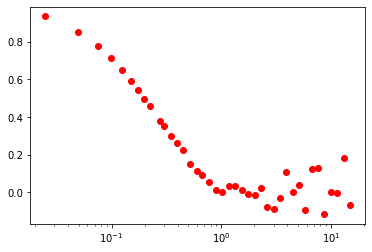

In [60]:
plt.semilogx(data.ISF.lagtime, data.ISF.sel(q=2, method='nearest'),'ro')
#print("ISF for q of %.2f" % data.ISF.q[18])

In [49]:
data.ISF[:,20]

<xarray.DataArray 'ISF' (lagtime: 40)>
array([ 0.92497181,  0.82569629,  0.74080921,  0.66635896,  0.60111791,
        0.54207322,  0.48957539,  0.44150038,  0.40601983,  0.33335902,
        0.30621864,  0.26077454,  0.21295405,  0.18439387,  0.11303895,
        0.08759696,  0.07725528,  0.06502474,  0.03390893,  0.05220499,
        0.02295602,  0.04996368, -0.03199765,  0.03006306, -0.01285048,
        0.0811229 ,  0.12791101,  0.02414185,  0.05038854,  0.00538281,
        0.00151916, -0.04003055, -0.0750881 ,  0.07159546, -0.01821287,
       -0.18272441,  0.00441572, -0.12341635,  0.12538646,  0.1686867 ])
Coordinates:
  * lagtime  (lagtime) float64 0.02484 0.04969 0.07453 ... 11.4 13.04 14.88
    q        float64 2.231

In [53]:
data.ISF.q[18]

<xarray.DataArray 'q' ()>
array(2.0081203)
Coordinates:
    q        float64 2.008